<h1>D2.4.55 Analytics</h1>

<h3>For other D50 Series Relese analytics check Below links</h3>
<a href="#">D2.4.50</a>&nbsp;&nbsp;&nbsp;<a href="#">D2.4.51</a>&nbsp;&nbsp;&nbsp;<a href="#">D2.4.52</a>&nbsp;&nbsp;&nbsp;<a href="#">D2.4.53</a>&nbsp;&nbsp;&nbsp;<a href="#">D2.4.54</a>&nbsp;&nbsp;&nbsp;<a href="#">D2.4.55</a>&nbsp;&nbsp;&nbsp;<a href="#">D2.4.56</a>&nbsp;&nbsp;&nbsp;<a href="#">D2.4.57</a>&nbsp;&nbsp;&nbsp;<a href="#">D2.4.58</a>&nbsp;&nbsp;&nbsp;<a href="#">D2.4.59</a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('D2.4.55.csv')

In [3]:
data.columns = data.columns.str.replace(' ','_')
data = data.drop(columns=['_PL_File_Size'])
data = data.drop(columns=['_Replication_Window'])
data = data.drop(columns=['_ST_File_Size'])
data = data.fillna(0)
data = data.rename(columns={'EOD_Duration(s)':'EOD_Duration','_Replication_Duration(s)':'Replication_Duration'})
data = data.replace('-',0)
data['EOD_Duration'] = data['EOD_Duration'].astype(float)
data['Replication_Duration'] = data['Replication_Duration'].astype(float)
data['_Dep_Duration'] = data['_Dep_Duration'].astype(float)
data.head()

,Country,Store,Name,Date,EOD_Start,EOD_Finish,EOD_Duration,_Backup_Start,_Backup_End,_Replication_Start,_Replication_End,Replication_Duration,_Deployment_Start,_Deployment_End,_Dep_Duration
0,England UK,1,Basingstoke,17/09/2018,17/09/2018 19:39:22,17/09/2018 21:04:41,5119.0,17/09/2018 20:02:17,17/09/2018 20:26:54,17/09/2018 20:32:19,17/09/2018 20:36:48,269.0,17/09/2018 20:38:01,17/09/2018 20:38:21,20.0
1,England UK,2,Southampton,17/09/2018,17/09/2018 19:35:37,17/09/2018 22:38:58,11001.0,17/09/2018 19:57:31,17/09/2018 21:28:37,17/09/2018 21:49:04,17/09/2018 22:00:29,685.0,17/09/2018 22:00:49,17/09/2018 22:05:47,298.0
2,England UK,3,Isle of Wight,17/09/2018,17/09/2018 18:15:36,17/09/2018 20:16:31,7255.0,17/09/2018 18:55:34,17/09/2018 19:16:20,17/09/2018 19:20:35,17/09/2018 19:25:24,289.0,17/09/2018 19:25:32,17/09/2018 19:29:35,243.0
3,Wales UK,5,Port Talbot,17/09/2018,17/09/2018 17:44:59,17/09/2018 18:41:19,3380.0,17/09/2018 18:19:03,17/09/2018 18:26:22,17/09/2018 18:29:37,17/09/2018 18:33:32,235.0,17/09/2018 18:33:59,17/09/2018 18:37:08,189.0
4,England UK,8,Peterborough,17/09/2018,17/09/2018 18:39:38,17/09/2018 22:03:20,12222.0,17/09/2018 19:03:10,17/09/2018 19:56:24,17/09/2018 20:07:00,17/09/2018 20:10:09,189.0,17/09/2018 20:12:30,17/09/2018 20:13:27,57.0


### Deployment Date

D2.4.55 was rolled out on

In [4]:
date = data['Date'].head(1)
date_Deployed = date.to_string().replace("0    "," ")
print(date_Deployed)

 17/09/2018


### Regions Deployed

D2.4.55 was Deployed on the Below Regions 

In [5]:
region_rolled_out = data.Country.unique()
for elements in region_rolled_out:
    print(elements)

England  UK
Wales  UK
Channel Islands
Scotland  UK
Northern Ireland  UK
Isle of Man


### Max EOD Time

In [6]:
maxEOD = data[['Name','EOD_Duration']].where(data['EOD_Duration'] == data['EOD_Duration'].max())
maxEOD.dropna()

,Name,EOD_Duration
73,Glasgow,23072.0


<h3> Min EOD Time </h3>

In [7]:
data['EOD_Duration'] = data['EOD_Duration'].replace(0,np.nan)
min_EOD = data[['Name','EOD_Duration']].where (data['EOD_Duration'] == data['EOD_Duration'].min())
min_EOD.dropna()

,Name,EOD_Duration
737,Hampton,2022.0


### Total failed EOD

In [8]:
data['EOD_Duration'] = data['EOD_Duration'].replace(np.nan,0)
minEOD = data[['Name','EOD_Duration']].where(data['EOD_Duration'] == data['EOD_Duration'].min())
minEOD = minEOD.dropna()
TotalfailedEOD = len(minEOD)
print(TotalfailedEOD,"number of stores didn't ran EOD")

110 number of stores didn't ran EOD


<h3> Total successful EOD</EOD>

In [9]:
data['EOD_Duration'] = data['EOD_Duration'].replace(np.nan,0)
maxEOD = data[['Name','EOD_Duration']].where(data['EOD_Duration'] != data['EOD_Duration'].min())
maxEOD = maxEOD.dropna()
TotalsuccessfulEOD = len(maxEOD)
print(TotalsuccessfulEOD,"number of stores have successful EOD")

721 number of stores have successful EOD


### Average EOD Time

In [10]:
import math
MeanEOD = data['EOD_Duration'].mean()
print('The average time taken for the EOD is ',math.ceil(MeanEOD),'seconds')

The average time taken for the EOD is  4468 seconds


<h3>EOD success Failure Distribution</h3>

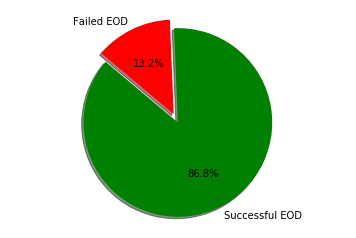

In [12]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Successful EOD', 'Failed EOD'
sizes = [TotalsuccessfulEOD,TotalfailedEOD]
colors = ['Green', 'Red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### Max Replication Time

In [13]:
maxRep = data[['Name','Replication_Duration']].where(data['Replication_Duration'] == data['Replication_Duration'].max())
maxRep.dropna()

,Name,Replication_Duration
485,Batley,6324.0


### Min Replication Time

In [14]:
data['Replication_Duration'] = data['Replication_Duration'].replace(0,np.nan)
min_Rep = data[['Name','Replication_Duration']].where (data['Replication_Duration'] == data['Replication_Duration'].min())
min_Rep.dropna()

,Name,Replication_Duration
308,Aldershot,99.0
693,Westway Cross,99.0


<h3>Total Failed Replication</h3>

In [15]:
data['Replication_Duration'] = data['Replication_Duration'].replace(np.nan,0)
minRep = data[['Name','Replication_Duration']].where(data['Replication_Duration'] == data['Replication_Duration'].min())
minRep = minRep.dropna()
Totalreplicationfailed = len(minRep) 
print(Totalreplicationfailed,"number of stores didn't ran Replication")

36 number of stores didn't ran Replication


<h3> Total successful Replication </h3>

In [16]:
data['Replication_Duration'] = data['Replication_Duration'].replace(np.nan,0)
maxRep = data[['Name','Replication_Duration']].where(data['Replication_Duration'] != data['Replication_Duration'].min())
maxRep = maxRep.dropna()
Totalreplicationsuccessful = len(maxRep) 
print(Totalreplicationsuccessful,"number of stores didn't ran Replication")

795 number of stores didn't ran Replication


### Average Replication Time

In [17]:
MeanRep = data['Replication_Duration'].mean()
print('The average time taken for the Replication is ',math.ceil(MeanRep),'seconds')

The average time taken for the Replication is  271 seconds


<h3> Replication success failure distribution </h3>

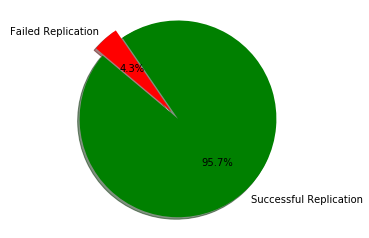

In [18]:
# Data to plot
labels = 'Successful Replication', 'Failed Replication'
sizes = [Totalreplicationsuccessful,Totalreplicationfailed]
colors = ['Green', 'Red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### Max Deployment Time

In [19]:
maxDep = data[['Name','_Dep_Duration']].where(data['_Dep_Duration'] == data['_Dep_Duration'].max())
maxDep.dropna()

,Name,_Dep_Duration
582,Ludlow,1134.0


### Min Deployment Time

In [20]:
data['_Dep_Duration'] = data['_Dep_Duration'].replace(0,np.nan)
min_Dep = data[['Name','_Dep_Duration']].where (data['_Dep_Duration'] == data['_Dep_Duration'].min())
min_Dep.dropna()

,Name,_Dep_Duration
0,Basingstoke,20.0
671,Petersfield,20.0
780,North Walsham,20.0


<h3> Total Failed Deployment</h3>

In [21]:
data['_Dep_Duration'] = data['_Dep_Duration'].replace(np.nan,0)
min_Dep = data[['Name','_Dep_Duration']].where (data['_Dep_Duration'] == data['_Dep_Duration'].min())
minDep = min_Dep.dropna()
totalfailedDeployment = len(minDep)
print(totalfailedDeployment,"number of stores where artifacts didn't got deployed")

135 number of stores where artifacts didn't got deployed


<h3> Total successful Deployment </h3>

In [22]:
max_Dep = data[['Name','_Dep_Duration']].where (data['_Dep_Duration'] != data['_Dep_Duration'].min())
maxDep = max_Dep.dropna()
totalsuccessfulDeployment = len(maxDep)
print(totalsuccessfulDeployment,"number of stores where artifacts got deployed successfully")

696 number of stores where artifacts got deployed successfully


### Average Deployment Time

In [23]:
MeanDep = data['_Dep_Duration'].mean()
print('The average time taken for the Deployment is ',math.ceil(MeanDep),'seconds')


The average time taken for the Deployment is  119 seconds


<h3> Deployment Success Failure Distribution</h3> 

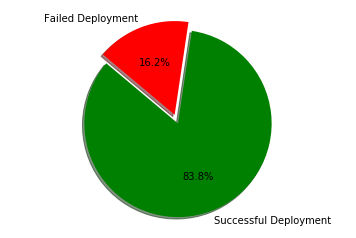

In [24]:
# Data to plot
labels = 'Successful Deployment', 'Failed Deployment'
sizes = [totalsuccessfulDeployment,totalfailedDeployment]
colors = ['Green', 'Red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [26]:
#data['Replication_Duration'] = data['Replication_Duration'].replace(np.nan,0)
#maxRep = data[['Name','Replication_Duration']].where(data['Replication_Duration'] != data['Replication_Duration'].min())
#maxRep = maxRep.dropna()
import pandas_profiling
profile_report = pandas_profiling.ProfileReport(data)
profile_report.to_file('D2.4.55_DrillDown.html')
#profile_report.to_html()
#Totalreplicationsuccessful = len(maxRep) 
#print(Totalreplicationsuccessful,"number of stores didn't ran Replication")

<a href="Analytics/D2.4.55_DrillDown.html">Drill Down for more Analytics</a>